In [1]:
function create_matrix(m)
    B = [ i == j        ?  4. :
          abs(i-j) == 1 ? -1. : 0.
              for i in 1:m, j in 1:m ]
    A = zeros(m * m, m * m)

    for i = 1:m
        for j = 1:m
            if i == j
                A[m*(i - 1) + 1 : m*i, m*(j - 1) + 1: m*j] = B
            elseif abs(i - j) == 1
                A[m*(i - 1) + 1 : m*i, m*(j - 1) + 1: m*j] = -eye(m)            
            end
        end
    end
    
    return A
end

create_matrix (generic function with 1 method)

In [2]:
function create_rhs(m)
    return ones(m * m)
end

create_rhs (generic function with 1 method)

In [3]:
function gradient_descent(A, b, tol = 1e-8, max_iter = 20000)
    m, n = size(A)
    if m != n
        error("Matrix not symmetric.")
    end
    if n != length(b)
        error("Right-hand side has incorrect size")
    end
    
    x = zeros(n)
    r = b - A*x
    
    for k = 1:max_iter
        t = A*r;
        α = (transpose(r)*r)/(transpose(t)*r)
        x = x + α*r
        r = r - α*t
    
        #Convergence check
        if (norm(r) / norm(x) <= tol)
            return x, k
        end
    end
    return x, k
    error("Iterative scheme diverged")
end

gradient_descent (generic function with 3 methods)

In [4]:
function conjugate_gradient(A, b, tol = 1e-8, max_iter = 20000)
     m, n = size(A)
    if m != n
        error("Matrix not symmetric.")
    end
    if n != length(b)
        error("Right-hand side has incorrect size")
    end
    
    x = zeros(n)
    r = b - A*x
    d = r
    
    for k = 1:max_iter
        t = A*d
        α = (transpose(r)*r)/(transpose(t)*d)
        x = x + α*d
        β = transpose(r)*r
        r = r - α*t
        γ = transpose(r)*r
        d = r + (γ/β)*d
        
        #Convergence check
        if (norm(r) / norm(x) <= tol)
            return x, k
        end
    end
    return x, k 
    error("Iterative scheme diverged")
end

conjugate_gradient (generic function with 3 methods)

In [5]:
function PCG(A, b, ω=1, tol = 1e-8, max_iter = 20000)
    m, n = size(A)
    if m != n
        error("Matrix not symmetric.")
    end
    if n != length(b)
        error("Right-hand side has incorrect size")
    end
    
    D = diagm(diag(A));
    L = tril(A,-1)
    R = triu(A,1)
    C = (D + ω*L)*inv(D)*(D + ω*R)*(1/((2-ω)ω))
    x = zeros(n)
    r = b - A*x
    ρ = C\r
    d = ρ
    
    for k = 1:max_iter
        t = A*d
        α = (transpose(r)*ρ)/(transpose(t)*d)
        x = x + α*d
        β = transpose(r)*ρ
        r = r - α*t
        ρ = C\r
        γ = transpose(r)*ρ
        d = ρ + (γ/β)*d
        #Convergence check
        if (norm(r) / norm(x) <= tol)
            return x, k
        end
    end
end

PCG (generic function with 4 methods)

In [6]:
m = [2^k for k = 1:5]
k = zeros(5)
gradient_descent_iterations = zeros(5)
CG_iterations = zeros(5)
PCG_iterations = zeros(5)
for i in 1:5
    A = create_matrix(m[i])
    b = create_rhs(m[i])
    gradient_descent_iterations[i] = gradient_descent(A, b)[2];
    CG_iterations[i] = conjugate_gradient(A, b)[2];
    PCG_iterations[i] = PCG(A, b)[2];
end

In [36]:
println(gradient_descent_iterations)
println(CG_iterations)
println(PCG_iterations)

[1.0, 60.0, 246.0, 896.0, 3193.0]
[1.0, 3.0, 10.0, 26.0, 53.0]
[3.0, 7.0, 11.0, 17.0, 29.0]


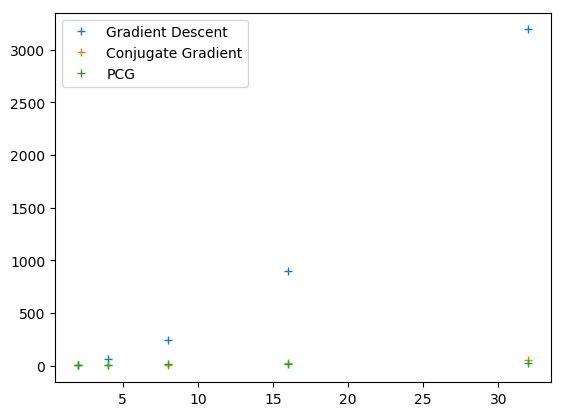

In [37]:
using PyPlot
    plot(m, gradient_descent_iterations, label = "Gradient Descent", linestyle = "", "+")
    plot(m, CG_iterations, label = "Conjugate Gradient", linestyle = "", "+")
    plot(m, PCG_iterations, label = "PCG", linestyle = "", "+")
legend();